# Currency Exchange Rate Prediction using Python
## Lecturer:
- **Prof. PHAUK Sokkhey (Cours)**
- **Mr. PEN Chentra (TP)**
## Team Members:
| |**Name**|**ID**|
|----|----------------------|----------------|
|**1.**|**PAV Limseng**|**e20211548**|
|**2.**|**MA Ousa**|**e20210359**|
|**3.**|**KOUM Soknan**|**e20211754**|
|**4.**|**PEL Bunkhloem**|**e20201314**|
|**5.**|**KHON Khengmeng**|**e20210179**|


To predict the currency exchange rate with machine learning, we first need to get the most appropriate data for this task. To get a dataset for this task just follow the steps mentioned below:
<ol>
    <li> Go to <a href="https://search.yahoo.com/">Yahoo Finance</a></li>
    <li>Search for “USD/KHR(KHR=x)”</li>
    <li>Click on “Historical Data”</li>
    <li>Click on “Download”</li>
</ol>

By following the steps mentioned above, you will be able to download the historical data of currency exchange rates of Indian Rupees. After clicking on download you will receive a CSV file in your downloads folder.

Now let’s import the necessary Python libraries that we need for this task and read the dataset:

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # setting seaborn default for plots
plt.style.use('ggplot')

dataset = "EUR=X.csv"

data = pd.read_csv(dataset)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-23,0.92041,0.92187,0.91579,0.92038,0.92038,0
1,2023-01-24,0.91960,0.92257,0.91770,0.91960,0.91960,0
2,2023-01-25,0.91843,0.92097,0.91553,0.91843,0.91843,0
3,2023-01-26,0.91558,0.92152,0.91470,0.91558,0.91558,0
4,2023-01-27,0.91790,0.92261,0.91730,0.91790,0.91790,0


In this dataset, the values in the “Close” column are the target values that we need to predict. So let’s take a closer look at these values:

In [67]:
data.shape

(262, 7)

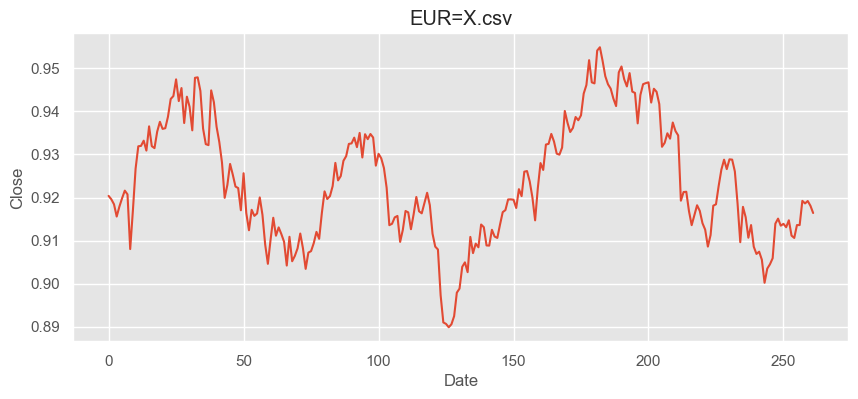

In [68]:
plt.figure(figsize=(10, 4))
plt.title(dataset)
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

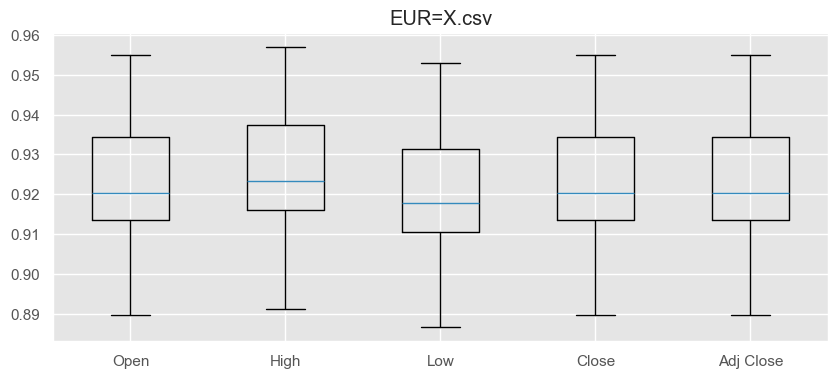

In [69]:
# draw pair box plot

col = ["Open", "High", "Low", "Close", "Adj Close"]

plt.figure(figsize=(10, 4))
plt.title(dataset)
plt.boxplot(data[col], labels=col)
plt.show()

## Data Preprocessing

In [70]:
# preprocessing

# drop Volume column
data = data.drop(['Volume'], axis=1)
data.head()

,Date,Open,High,Low,Close,Adj Close
0,2023-01-23,0.92041,0.92187,0.91579,0.92038,0.92038
1,2023-01-24,0.91960,0.92257,0.91770,0.91960,0.91960
2,2023-01-25,0.91843,0.92097,0.91553,0.91843,0.91843
3,2023-01-26,0.91558,0.92152,0.91470,0.91558,0.91558
4,2023-01-27,0.91790,0.92261,0.91730,0.91790,0.91790


In [71]:
# find outlier of each column except date and remove the outlier
Q1 = data['Open'].quantile(0.25)
Q3 = data['Open'].quantile(0.75)
IQR = Q3 - Q1
# set outlier to null
data['Open'] = np.where(data['Open'] > (Q3 + 1.5 * IQR), None, data['Open'])
data['Open'] = np.where(data['Open'] < (Q1 - 1.5 * IQR), None, data['Open'])

Q1 = data['High'].quantile(0.25)
Q3 = data['High'].quantile(0.75)
IQR = Q3 - Q1
# set outlier to null
data['High'] = np.where(data['High'] > (Q3 + 1.5 * IQR), None, data['High'])
data['High'] = np.where(data['High'] < (Q1 - 1.5 * IQR), None, data['High'])

Q1 = data['Low'].quantile(0.25)
Q3 = data['Low'].quantile(0.75)
IQR = Q3 - Q1
# set outlier to null
data['Low'] = np.where(data['Low'] > (Q3 + 1.5 * IQR), None, data['Low'])
data['Low'] = np.where(data['Low'] < (Q1 - 1.5 * IQR), None, data['Low'])

Q1 = data['Close'].quantile(0.25)
Q3 = data['Close'].quantile(0.75)
IQR = Q3 - Q1
# set outlier to null
data['Close'] = np.where(data['Close'] > (Q3 + 1.5 * IQR), None, data['Close'])
data['Close'] = np.where(data['Close'] < (Q1 - 1.5 * IQR), None, data['Close'])

Q1 = data['Adj Close'].quantile(0.25)
Q3 = data['Adj Close'].quantile(0.75)
IQR = Q3 - Q1
# set outlier to null
data['Adj Close'] = np.where(data['Adj Close'] > (Q3 + 1.5 * IQR), None, data['Adj Close'])
data['Adj Close'] = np.where(data['Adj Close'] < (Q1 - 1.5 * IQR), None, data['Adj Close'])

In [72]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

In [73]:
# fill null value with min value
data['Open'].fillna(data['Open'].min(), inplace=True)
data['High'].fillna(data['High'].min(), inplace=True)
data['Low'].fillna(data['Low'].min(), inplace=True)
data['Close'].fillna(data['Close'].min(), inplace=True)
data['Adj Close'].fillna(data['Adj Close'].min(), inplace=True)

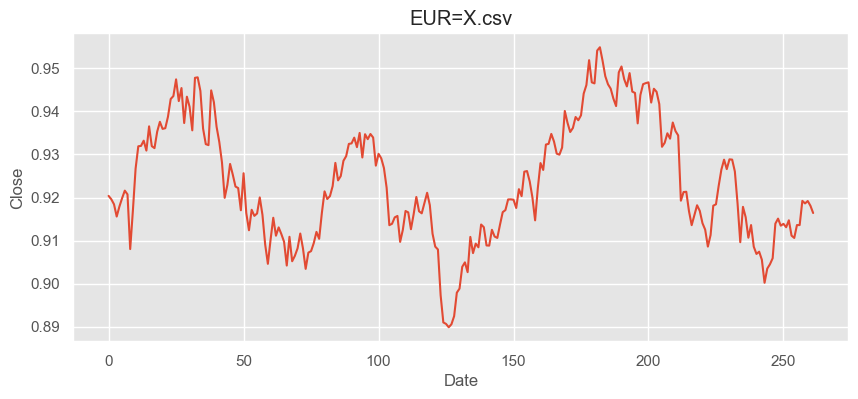

In [74]:
# plot line graph for ['Close']
plt.figure(figsize=(10, 4))
plt.title(dataset)
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

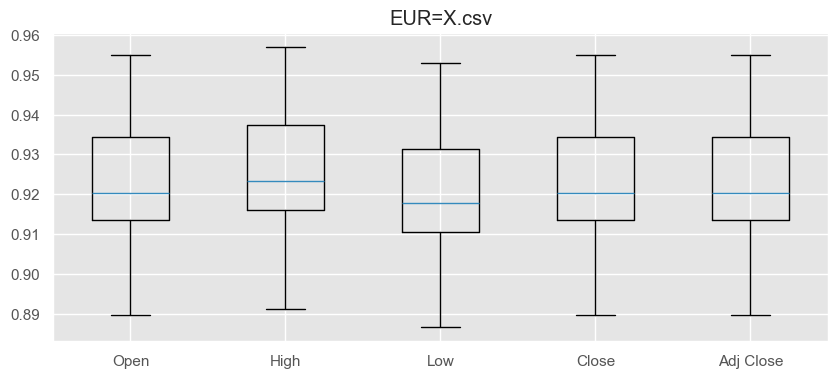

In [75]:
# draw pair box plot

col = ["Open", "High", "Low", "Close", "Adj Close"]

plt.figure(figsize=(10, 4))
plt.title(dataset)
plt.boxplot(data[col], labels=col)
plt.show()

# Descriptive Statistics

In [76]:
data.describe()

,Date,Open,High,Low,Close,Adj Close
count,262,262.0000,262.0000,262.0000,262.0000,262.0000
unique,262,252.0000,251.0000,248.0000,252.0000,252.0000
top,2023-01-23,0.9136,0.9448,0.9159,0.9136,0.9136
freq,1,3.0000,2.0000,3.0000,3.0000,3.0000


Now let’s have a look at the correlation between the features before training the currency exchange rate prediction model:

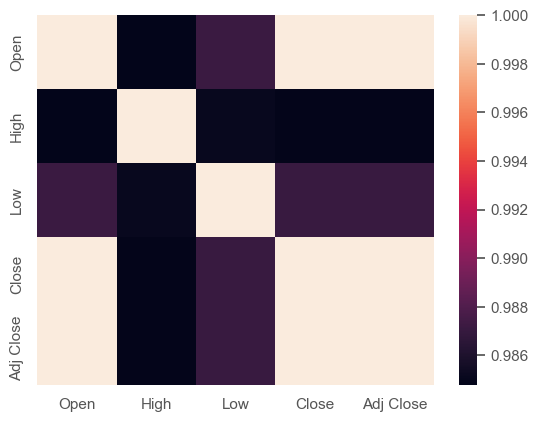

In [77]:
# Select all columns except the first one
data_for_corr = data.iloc[:, 1:]

# Calculate the correlation matrix
corr_matrix = data_for_corr.corr()

# Create a heatmap
sns.heatmap(corr_matrix)
plt.show()

Now the next step is to prepare the dataset by storing the most relevant features in the variable x and storing the target column in the variable y:

In [78]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

## Using Linear Regression

In [79]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Train the model
model.fit(xtrain, ytrain)
# Make predictions
ypred = model.predict(xtest)


## Using Decision Tree Regression

In [80]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor()
# Train the model
model_DT.fit(xtrain1, ytrain1)
# Make predictions
ypred1 = model.predict(xtest1)


### Predicted Values of Linear Regression

In [81]:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
data.head(7)

,Predicted Rate
0,0.915072
1,0.916811
2,0.944584
3,0.931612
4,0.904202
5,0.908441
6,0.939109


### Predicted Values of Decision Regression

In [82]:
data = pd.DataFrame(data={"Predicted Rate": ypred1.flatten()})
data.head(7)

,Predicted Rate
0,0.915072
1,0.916811
2,0.944584
3,0.931612
4,0.904202
5,0.908441
6,0.939109


### Plot of Predicted Values of Linear Regression

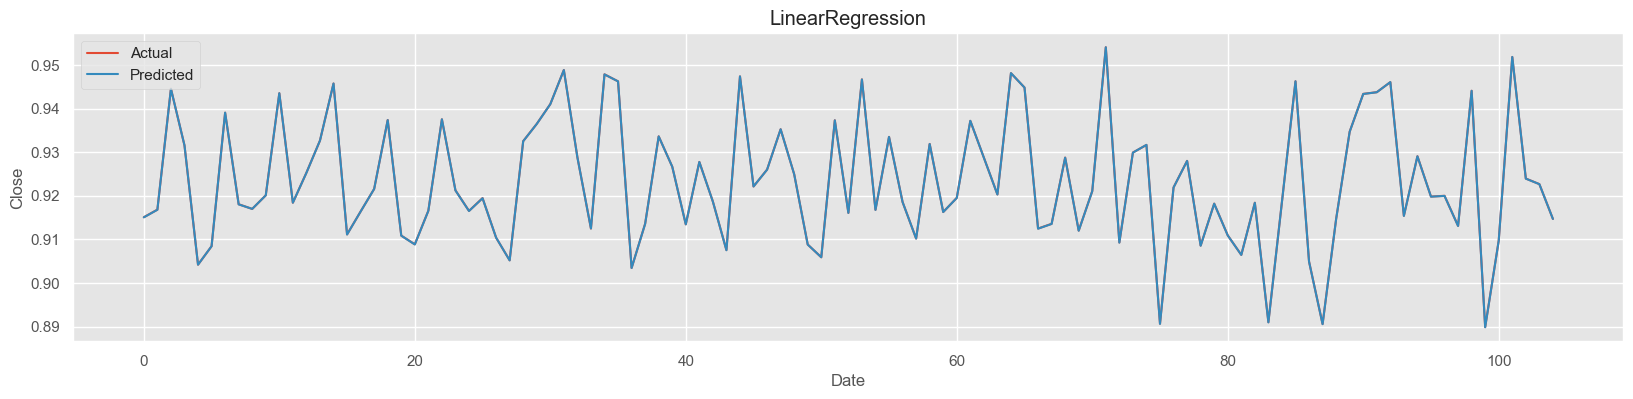

In [83]:
# Plot the results
plt.figure(figsize=(20, 4))
plt.title("LinearRegression")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(ytest, label="Actual")
plt.plot(ypred, label="Predicted")
plt.legend()
plt.show()

### Plot of Predicted Values of Decision tree Regression

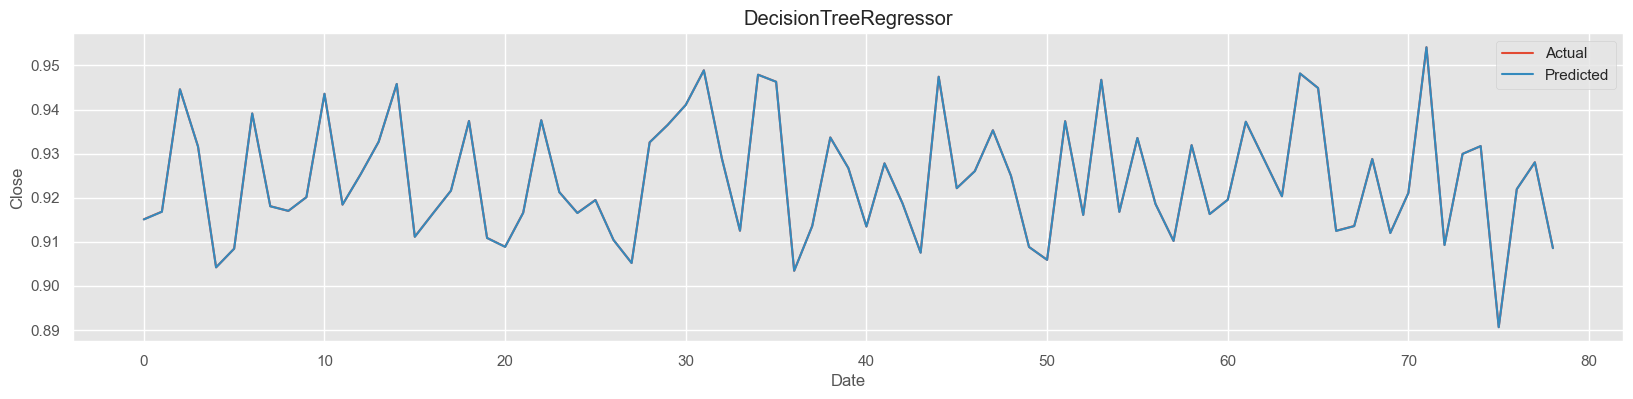

In [84]:
plt.figure(figsize=(20, 4))
plt.title('DecisionTreeRegressor')
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(ytest1, label="Actual")
plt.plot(ypred1, label="Predicted")
plt.legend()
plt.show()

### Get the accuracy rate of our model

## Linear Model

In [85]:
# Calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
print('LinearRegression Result:')
mae = mean_absolute_error(ytest, ypred)
print("MAE:", mae)

# Calculate the mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(ytest, ypred)
print("MSE:", mse)

# Calculate the root mean squared error
from math import sqrt

rmse = sqrt(mse)
print("RMSE:", rmse)

# Calculate the mean absolute percentage error
errors = abs(ypred - ytest)
mape = 100 * (errors / ytest)

# Calculate R_squared
from sklearn.metrics import r2_score

r2 = r2_score(ytest, ypred)
print("R2:", r2)

# Calculate adjusted R_squared
n = x.shape[0]
p = x.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R2:", adj_r2)

LinearRegression Result:
MAE: 1.6254511035164652e-05
MSE: 3.6225932869248694e-10
RMSE: 1.9033111377084068e-05
R2: 0.9999982967532732
Adjusted R2: 0.9999982769480787


## Decision Tree Model

In [86]:
# Calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
print("DecisionTreeRegressor Result:")
mae1 = mean_absolute_error(ytest1, ypred1)
print("MAE:", mae1)

# Calculate the mean squared error
from sklearn.metrics import mean_squared_error

mse1 = mean_squared_error(ytest1, ypred1)
print("MSE:", mse1)

# Calculate the root mean squared error
from math import sqrt

rmse1 = sqrt(mse1)
print("RMSE:", rmse1)

# Calculate the mean absolute percentage error
errors1 = abs(ypred1 - ytest1)
mape1 = 100 * (errors1 / ytest1)

# Calculate R_squared
from sklearn.metrics import r2_score

r21 = r2_score(ytest1, ypred1)
print("R2:", r21)

# Calculate adjusted R_squared
n = x.shape[0]
p = x.shape[1]
adj_r21 = 1 - (1 - r21) * (n - 1) / (n - p - 1)

print("Adjusted R2:", adj_r21)

DecisionTreeRegressor Result:
MAE: 1.5268892233469314e-05
MSE: 3.29302339941505e-10
RMSE: 1.8146689503639638e-05
R2: 0.999998190047429
Adjusted R2: 0.9999981690014689
